## DSP Homework 1
### Variance, Standard Deviation, and SNR Analysis of EEG Signals

Problem Description

In this notebook, two discrete EEG signals recorded from the same subject are analyzed:

 - Signal A: Awake state

 - Signal B: Sleep state

The objectives are:

 1. Compute mean (μ)

 2. Construct deviation table (μ − xᵢ)

 3. Compute variance (σ²)

 4. Compute standard deviation (σ)

 5. Compare SNR assuming equal noise standard deviation

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Define EEG Signals

In [2]:
A = np.array([10, 25, -8, 18, -15, 30, -5, 22])
B = np.array([4, 6, -3, 8, -5, 7, -2, 9])

### Mean Value ( μ ): The mean represents the average amplitude of each EEG signal.

In [3]:
mu_A = np.mean(A)
mu_B = np.mean(B)

print(f"Mean of Signal A: {mu_A:.1f}")
print(f"Mean of Signal B: {mu_B:.1f}")

Mean of Signal A: 9.6
Mean of Signal B: 3.0


### Time-Domain Plot (Raw Signals)

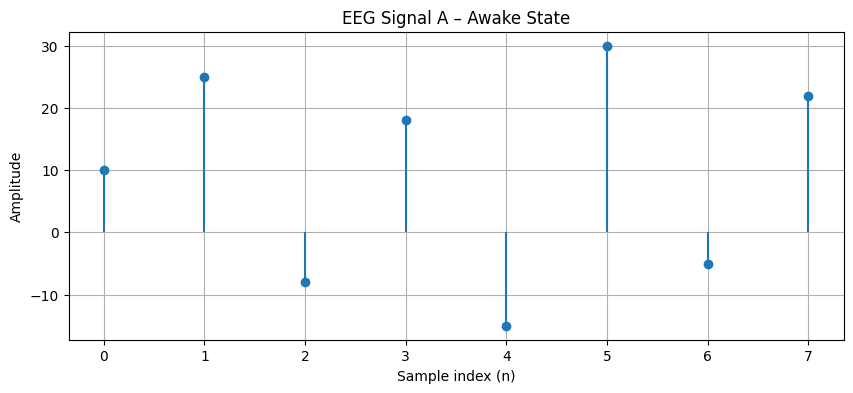

In [4]:
n = np.arange(len(A))

plt.figure(figsize=(10,4))
plt.stem(n, A, basefmt=" ")
plt.xlabel("Sample index (n)")
plt.ylabel("Amplitude")
plt.title("EEG Signal A – Awake State")
plt.grid()
plt.show()

### Deviation Table ( μ − xᵢ ): This table shows the deviation of each sample from the mean.

In [5]:
# Signal A
df_A = pd.DataFrame({
    "x_i": A,
    "μ - x_i": mu_A - A
})
print(df_A)

#Signal B
df_B = pd.DataFrame({
    "x_i": B,
    "μ - x_i": mu_B - B
})
print('\n',df_B)

   x_i  μ - x_i
0   10   -0.375
1   25  -15.375
2   -8   17.625
3   18   -8.375
4  -15   24.625
5   30  -20.375
6   -5   14.625
7   22  -12.375

    x_i  μ - x_i
0    4     -1.0
1    6     -3.0
2   -3      6.0
3    8     -5.0
4   -5      8.0
5    7     -4.0
6   -2      5.0
7    9     -6.0


### Histogram of Deviations

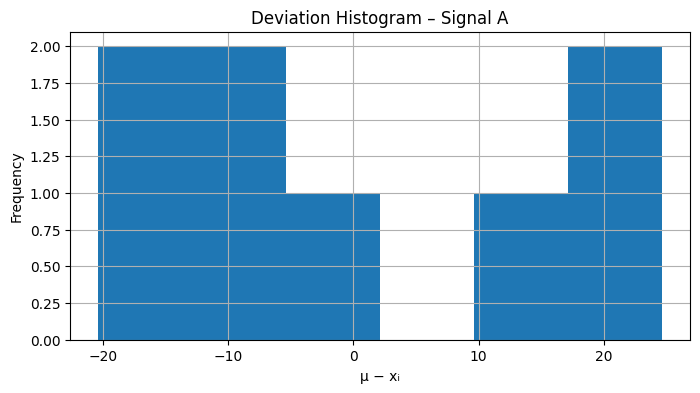

In [6]:
# Signal A
plt.figure(figsize=(8,4))
plt.hist(mu_A - A, bins=6)
plt.xlabel("μ − xᵢ")
plt.ylabel("Frequency")
plt.title("Deviation Histogram – Signal A")
plt.grid()
plt.show()

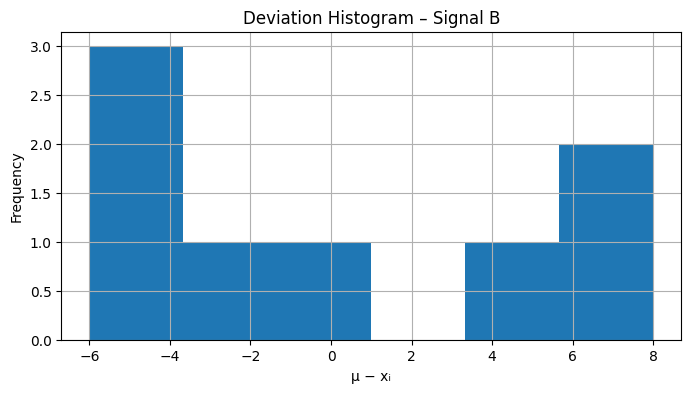

In [7]:
#Signal B
plt.figure(figsize=(8,4))
plt.hist(mu_B - B, bins=6)
plt.xlabel("μ − xᵢ")
plt.ylabel("Frequency")
plt.title("Deviation Histogram – Signal B")
plt.grid()
plt.show()

### Variance ( σ² ): Variance represents the average power of signal fluctuations.

In [8]:
var_A = np.mean((A - mu_A)**2)
var_B = np.mean((B - mu_B)**2)

print(f"Variance of Signal A: {var_A:.1f}")
print(f"Variance of Signal B: {var_B:.1f}")

Variance of Signal A: 250.7
Variance of Signal B: 26.5


### Squared Deviation Visualization

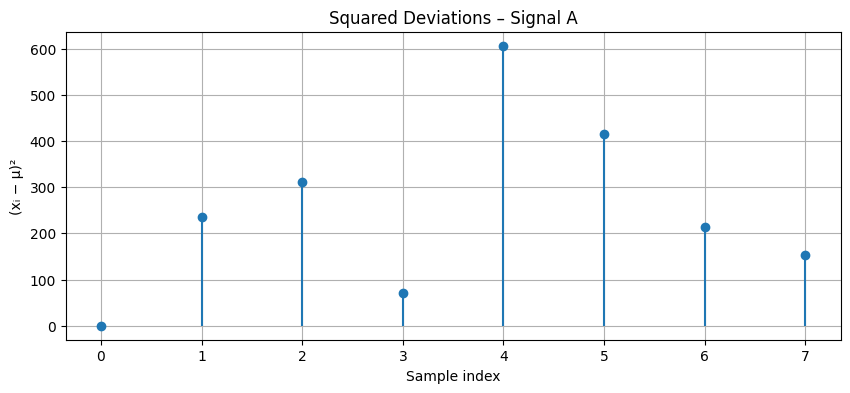

In [9]:
# Signal A
plt.figure(figsize=(10,4))
plt.stem((A - mu_A)**2, basefmt=" ")
plt.xlabel("Sample index")
plt.ylabel("(xᵢ − μ)²")
plt.title("Squared Deviations – Signal A")
plt.grid()
plt.show()

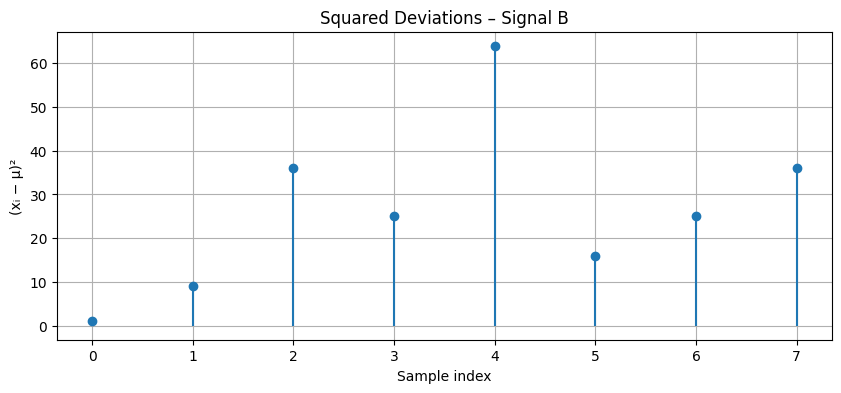

In [10]:
# Signal B
plt.figure(figsize=(10,4))
plt.stem((B - mu_B)**2, basefmt=" ")
plt.xlabel("Sample index")
plt.ylabel("(xᵢ − μ)²")
plt.title("Squared Deviations – Signal B")
plt.grid()
plt.show()

### Standard Deviation ( σ ): Standard deviation measures signal dispersion and has the same unit as noise.

In [11]:
std_A = np.sqrt(var_A)
std_B = np.sqrt(var_B)

print(f"Standard Deviation of Signal A: {std_A:.1f}")
print(f"Standard Deviation of Signal B: {std_B:.1f}")

Standard Deviation of Signal A: 15.8
Standard Deviation of Signal B: 5.1


### Histogram of Signal Amplitudes

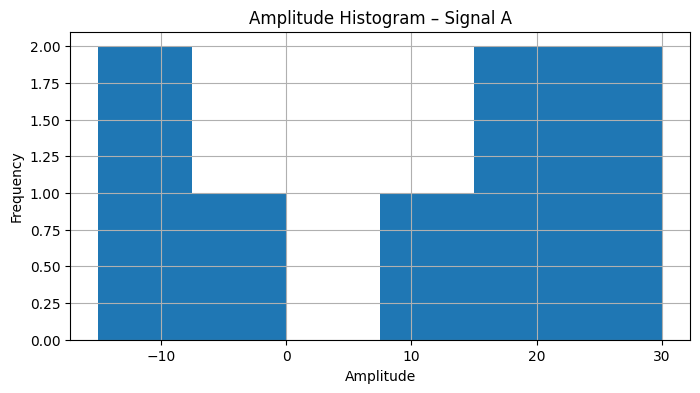

In [12]:
# Signal A
plt.figure(figsize=(8,4))
plt.hist(A, bins=6)
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.title("Amplitude Histogram – Signal A")
plt.grid()
plt.show()

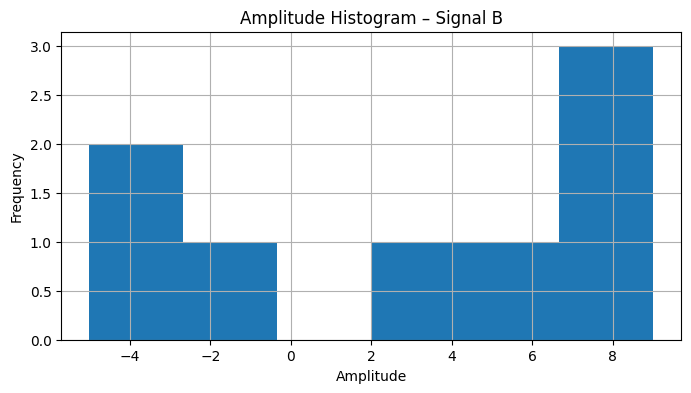

In [13]:
# Signal B
plt.figure(figsize=(8,4))
plt.hist(B, bins=6)
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.title("Amplitude Histogram – Signal B")
plt.grid()
plt.show()

### Signal-to-Noise Ratio (SNR) Comparison:

Assumption:

Both signals have the same noise standard deviation
Thus, SNR comparison depends only on signal variance.

### Relative SNR Computation

In [14]:
snr_ratio = var_A / var_B
print(f"SNR_A / SNR_B = {snr_ratio:.2f}")

SNR_A / SNR_B = 9.46


### SNR Decision

In [15]:
if var_A > var_B:
    print("Signal A has better SNR than Signal B.")
else:
    print("Signal B has better SNR than Signal A.")

Signal A has better SNR than Signal B.


### Final Summary Table

In [16]:
summary = pd.DataFrame({
    "Signal": ["A (Awake)", "B (Sleep)"],
    "Mean (μ)": [round(mu_A,1), round(mu_B,1)],
    "Variance (σ²)": [round(var_A,1), round(var_B,1)],
    "Std Dev (σ)": [round(std_A,1), round(std_B,1)],
    "Relative SNR": [round(snr_ratio,2), 1.0]
})
summary

,Signal,Mean (μ),Variance (σ²),Std Dev (σ),Relative SNR
0,A (Awake),9.6,250.7,15.8,9.46
1,B (Sleep),3.0,26.5,5.1,1.00


### Final Interpretation:
Signal A shows significantly higher variance and standard deviation
 - compared to Signal B, indicating stronger neural activity in the awake state.

 - Since both signals are assumed to have identical noise standard deviation, the signal with higher variance exhibits a higher SNR.

 - Therefore, Signal A has better signal quality than Signal B.